In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [3]:
data = pd.read_csv("C:\\Users\\sonja tilly.ABERDEEN\\loans\\loans.csv", low_memory=False)
pd.set_option('display.max_columns', len(data.columns))
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Explore the data

In [4]:
data['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [5]:
group = data.groupby('loan_status').agg([np.count_nonzero])
grouped = group['id'].reset_index()
grouped

,loan_status,count_nonzero
0,Charged Off,45248
1,Current,601779
2,Default,1219
3,Does not meet the credit policy. Status:Charge...,761
4,Does not meet the credit policy. Status:Fully ...,1988
5,Fully Paid,207723
6,In Grace Period,6253
7,Issued,8460
8,Late (16-30 days),2357
9,Late (31-120 days),11591


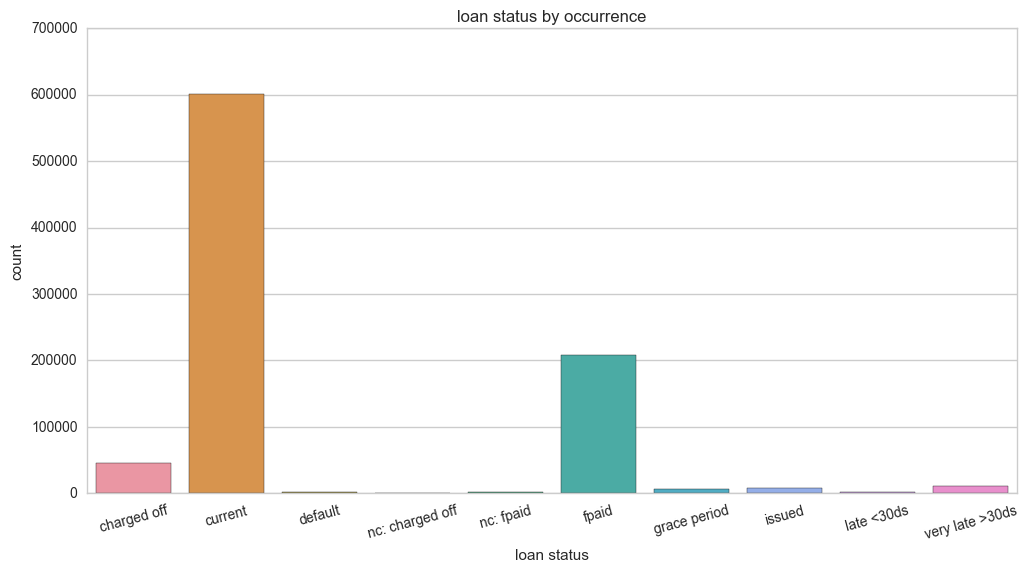

In [6]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 6))

sns.set_color_codes("muted")

ax = sns.barplot(x=grouped['loan_status'], y=grouped['count_nonzero'])
ax.set(xlabel = 'loan status', ylabel = 'count', title = 'loan status by occurrence')
ax.set_xticklabels(['charged off','current','default','nc: charged off','nc: fpaid','fpaid','grace period','issued','late <30ds', 'very late >30ds'], rotation=15)

# Loans distribution

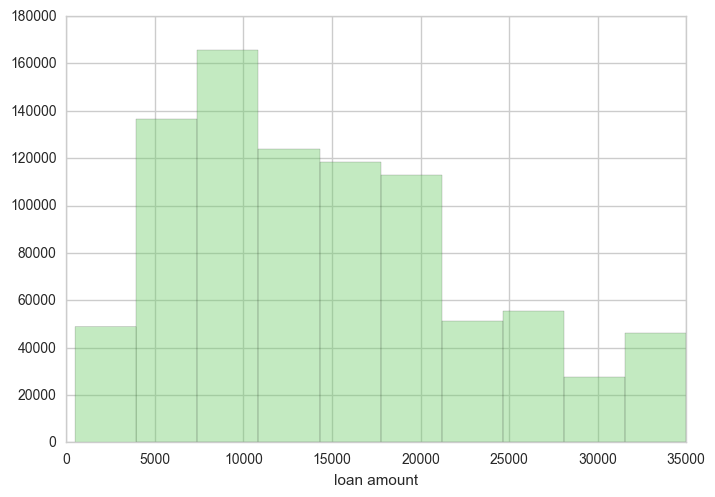

In [7]:

ax = sns.distplot(data['loan_amnt'], bins =10, kde=False, color="g", axlabel='loan amount')


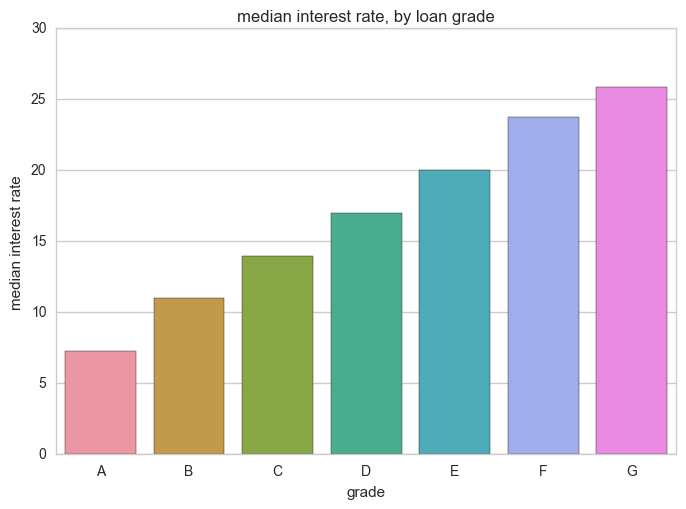

In [8]:
group2 = data.groupby('grade').agg([np.median])
interest_rate = group2['int_rate'].reset_index()

ax = sns.barplot(x = 'grade', y = 'median', data=interest_rate)
ax.set(xlabel = 'grade', ylabel = 'median interest rate', title = 'median interest rate, by loan grade')


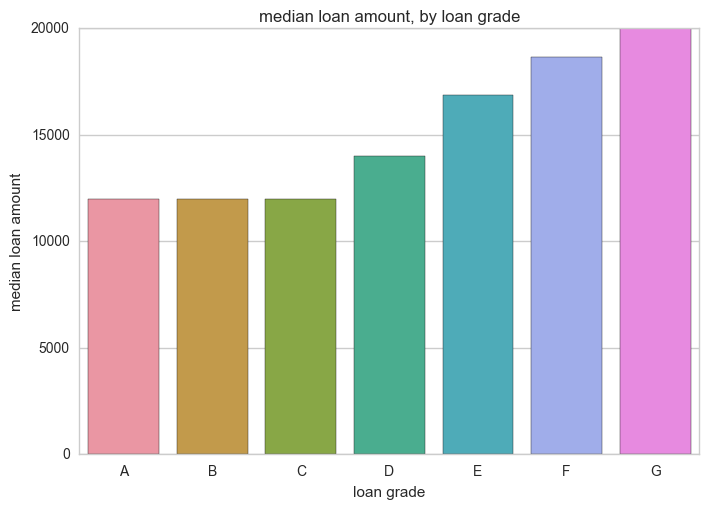

In [9]:
group = data.groupby('grade').agg([np.median])
loanamount = group['loan_amnt'].reset_index()

ax = sns.barplot(y = "median", x = 'grade', data=loanamount)
ax.set(xlabel = 'loan grade', ylabel = 'median loan amount', title = 'median loan amount, by loan grade')

## Clean data

In [10]:
data = data.fillna(0)

loans = pd.get_dummies(data['loan_status'])

In [11]:
features_raw = data[['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'title', 'zip_code', 'addr_state', 'application_type', 'verification_status_joint', 'initial_list_status']]
features_raw.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,title,zip_code,addr_state,application_type,verification_status_joint,initial_list_status
0,36 months,B,B2,0,10+ years,RENT,Verified,n,Computer,860xx,AZ,INDIVIDUAL,0,f
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,n,bike,309xx,GA,INDIVIDUAL,0,f
2,36 months,C,C5,0,10+ years,RENT,Not Verified,n,real estate business,606xx,IL,INDIVIDUAL,0,f
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,n,personel,917xx,CA,INDIVIDUAL,0,f
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,n,Personal,972xx,OR,INDIVIDUAL,0,f


In [12]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for col in features_raw.columns:
    features_raw[col] = le.fit_transform(data[col])

features_raw.head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,title,zip_code,addr_state,application_type,verification_status_joint,initial_list_status
0,0,1,6,0,1,5,2,0,8844,809,3,0,0,0
1,1,2,13,191490,10,5,1,0,49848,295,10,0,0,0
2,0,2,14,0,1,5,0,0,60706,571,14,0,0,0
3,0,2,10,3275,1,5,1,0,60383,855,4,0,0,0
4,1,1,9,241928,0,5,1,0,39339,908,37,0,0,0


In [ ]:
numerical = data[['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il']]

minmax = preprocessing.MinMaxScaler()

for col in numerical.columns:
    numerical[col] = minmax.fit_transform(numerical[col])

numerical.head()

In [ ]:
dates=pd.to_datetime(data['issue_d'], format='%b-%Y', errors='ignore')
dates.head()

In [ ]:
data_new = pd.concat([features_raw, numerical, loans, dates], axis=1)

## Apply models & check accuracy of predictions

In [ ]:
# separate X and y

y = data_new['Default']
X = data_new.drop('Default', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

In [ ]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import fbeta_score, accuracy_score
from time import time

beta = 0.5

# TODO: Initialize the models
clf_A = RandomForestClassifier(random_state=101)
clf_B = AdaBoostClassifier(random_state=101)

clf_A.fit(X_train, y_train)
clf_B.fit(X_train, y_train)

pred_A_train = clf_A.predict(X_train)
pred_B_train = clf_B.predict(X_train)

pred_A_test = clf_A.predict(X_test)
pred_B_test = clf_B.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred_A_test))

## Confusion matrix: RandomForests

In [ ]:
# generate confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred_A_test)

df_cm = pd.DataFrame(cm, index = ['True (positive)', 'True (negative)'])
df_cm.columns = ['Predicted (positive)', 'Predicted (negative)']

sns.heatmap(df_cm, annot=True, fmt="d")

## Confusion matrix: AdaBoost

In [ ]:
print(classification_report(y_test,pred_B_test))

In [ ]:
cm2 = confusion_matrix(y_test,pred_B_test)

df_cm2 = pd.DataFrame(cm2, index = ['True (positive)', 'True (negative)'])
df_cm2.columns = ['Predicted (positive)', 'Predicted (negative)']

sns.heatmap(df_cm2, annot=True, fmt="d")

## Factor importances: RandomForests

In [ ]:
# extract feature importances
import numpy as np

keyfeat_A = clf_A.feature_importances_
df = pd.DataFrame(keyfeat_A)
df.index = np.arange(1, len(df) + 1)

featurenames = data_new.columns
featurenames = pd.DataFrame(data_new.columns)
featurenames.drop(featurenames.head(1).index, inplace=True)

dfnew = pd.concat([featurenames, df], axis=1)
dfnew.columns = ['featurenames', 'weight']
dfsorted = dfnew.sort_values(['weight'], ascending=[False])
dfsorted.head()

In [ ]:
# plot feature importances

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.barplot(x=dfsorted['featurenames'].head(7), y=dfsorted['weight'].head(7))

ax.set(xlabel='feature names', ylabel='weight')

ax.set_title('Feature importances')

for item in ax.get_xticklabels():
    item.set_rotation(50)


## Feature importances: AdaBoost

In [ ]:
# extract feature importances
import numpy as np

keyfeat_B = clf_B.feature_importances_
df2 = pd.DataFrame(keyfeat_B)
df2.index = np.arange(1, len(df) + 1)

featurenames_B = data_new.columns
featurenames_B = pd.DataFrame(data_new.columns)
featurenames_B.drop(featurenames_B.head(1).index, inplace=True)

df_B = pd.concat([featurenames, df2], axis=1)
df_B.columns = ['featurenames', 'weight']
dfsorted_B = df_B.sort_values(['weight'], ascending=[False])
dfsorted_B.head()

In [ ]:
# plot feature importances

sns.set(style="whitegrid")
sns.set(font_scale=3)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(45, 10))

ax = sns.barplot(x=dfsorted_B['featurenames'].head(), y=dfsorted_B['weight'].head())

ax.set(xlabel='feature names', ylabel='weight')

ax.set_title('Feature importances')

for item in ax.get_xticklabels():
    item.set_rotation(50)
